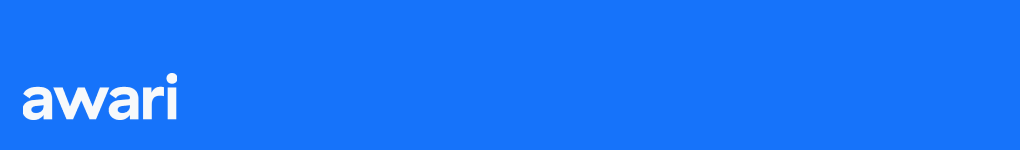

Prática da **Aula 05: Coleta de Dados I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Obtendo Dados de API**

## **Visão geral**

**API** (*Application Programming Interface*) é uma maneira de sistemas de computador se comunicarem entre si de forma automatizada.

Por exemplo, para que um aplicativo possa fazer cobranças por PIX, ele usa uma API disponibilizada pelo Banco Central para se comunicar com o sistema PIX.

Há muitas APIs com a finalidade de disponibilizar dados. Muitos dados financeiros, econômicos, de saúde etc., do Governo Brasileiro, já são disponibilizados dessa forma. Podemos usar este benefício para obter dados confiáveis e consistentes.

## **Objetivo da prática**

Demonstrar o passo a passo de como obter dados de uma API simples.

## **Realizando a obtenção dos dados**

Vamos importar Pandas (você verá que quase sempre ele é usado).

Em seguida, vamos instalar e importar uma fonte de dados (API) do **Sistema Gerenciador de Séries do Banco Central do Brasil**.

In [1]:
## Importando Pandas
import pandas as pd

# Instalando e importando dados do Sistema Gerenciador de Séries do Banco Central
!pip install python-bcb
from bcb import sgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.8 MB/s eta 0:00:00


Agora, importaremos duas séries de dados da nossa fonte (API):
1. a variação do IPCA mensal; e
2. o desemprego medido pela PNADC.

In [2]:
ipca = sgs.get({'IPCA' : 433}, start = "2010-01-01")
desemprego = sgs.get({'desemprego' : 24369})
data = desemprego.merge(ipca, on = 'Date', how = 'left')

In [12]:
# Exibindo os dados do IPCA
ipca.tail(5)

,IPCA
Date,
2024-04-01,0.38
2024-05-01,0.46
2024-06-01,0.21
2024-07-01,0.38
2024-08-01,-0.02


In [15]:
# Exibindo os dados de desemprego
desemprego.describe()

,desemprego
count,148.000000
mean,10.193919
std,2.611258
min,6.300000
25%,7.700000
50%,10.400000
75%,12.400000
max,14.900000


In [16]:
# Exibindo os dois dados compilados
data.head()

,desemprego,IPCA
Date,,
2012-03-01,8.0,0.21
2012-04-01,7.8,0.64
2012-05-01,7.7,0.36
2012-06-01,7.6,0.08
2012-07-01,7.5,0.43


Com isso, podemos usar os dados da maneira que quisermos ou necessitarmos. Um exemplo é exibir as séries por meio de um gráfico:

In [ ]:
# Exibindo os dados por meio de gráfico
import plotly.express as px

fig = px.line(data, y=['desemprego', 'IPCA'])
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## **Dicas extras**

APIs costumam ser bem diferentes umas das outras.

APIs de sistemas robustos, como de dados estatísticos nacionais ou para comunicação com sistemas do Google, por exemplo, possuem documentações (às vezes extensas) que explicam como utilizá-las.

Nem sempre será papel do cientista de dados se aprofundar nos detalhes de APIs complexas. Em startups em estágio avançado de desenvolvimento e empresas maduras, isso é um trabalho que costuma ficar com engenheiros de dados.

No entanto, é interessante ao menos conhecer sobre APIs. Pode ser um diferencial em empresas onde os processos não estão tão estruturados, para obter rapidamente dados públicos ou até mesmo para projetos pessoais seus (como acompanhar variáções de investimentos por meio de [APIs da Bolsa de Valores](https://developers.b3.com.br/faq), por exemplo).

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**